## Mnist Student Handwriting Images Classification
- dataset: sklearn.datasets: fetch_openml-'mnist_784'
    - also available in cvs format at: https://www.kaggle.com/oddrationale/mnist-in-csv
- classfication: 
    - multi class: 0-9
    - binary class: 5/ not 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Read Data

In [2]:
from sklearn.datasets import fetch_openml
df=fetch_openml('mnist_784',version=1)

In [3]:
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y=df['data'],df['target']
print(X.shape,y.shape)

(70000, 784) (70000,)


70k image records, made from 784 (28*28 pixels) features.
- feature vector -> 28*28 array

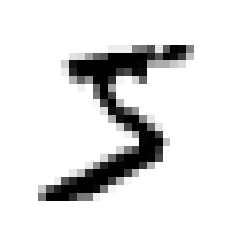

In [5]:
import matplotlib as mpl
X0_image=X[0].reshape(28,28)

plt.imshow(X0_image,cmap=mpl.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [6]:
y[0]

'5'

In [7]:
#string -> int
y=y.astype(np.uint8)
y[0]

5

#### train/test Split

In [8]:
X_train, X_test,y_train,y_test= X[:60000],X[60000:],y[:60000],y[60000:]

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [9]:
y_test[5]

1

### 2. Train Models

### binary classifier:

In [10]:
y_train_5=(y_train==5)
y_test_5=(y_test==5)

### SGDClassifier

In [11]:
from sklearn.linear_model import SGDClassifier

sgd=SGDClassifier()
sgd.fit(X_train,y_train_5)

SGDClassifier()

In [12]:
sgd.predict([X_test[20]])

array([False])

In [13]:
y_test_5[20] # guessed right

False

### Evaluate Performance

#### Accuracy

In [14]:
sgd.score(X_train,y_train_5) #Accuracy

0.96865

#### Cross-Validation

In [15]:
from sklearn.model_selection import cross_val_score

sgd_acc=cross_val_score(sgd,X_train,y_train_5,
                       scoring='accuracy',cv=10)
sgd_acc

array([0.97083333, 0.96666667, 0.96816667, 0.9515    , 0.94666667,
       0.93966667, 0.962     , 0.94916667, 0.964     , 0.96933333])

#### Precision/Recall

In [16]:
from sklearn.model_selection import cross_val_predict

y_train5_pred=cross_val_predict(sgd,X_train,y_train_5,cv=3)
y_train5_pred

array([ True, False, False, ...,  True, False, False])

In [17]:
from sklearn.metrics import precision_score,recall_score,confusion_matrix,f1_score

print("Confusion Matrix:",confusion_matrix(y_train_5,y_train5_pred),"\n",
      "Precision:",precision_score(y_train_5,y_train5_pred),"\n",
      "Recall:",recall_score(y_train_5,y_train5_pred),"\n",
      "f1 score:",f1_score(y_train_5,y_train5_pred))

Confusion Matrix: [[51808  2771]
 [ 1216  4205]] 
 Precision: 0.6027809633027523 
 Recall: 0.7756871425936174 
 f1 score: 0.6783899330483182


In [18]:
y_score=cross_val_predict(sgd,X_train,y_train_5,cv=3,
                         method='decision_function')
y_score

array([  9393.14994954, -20440.10110529, -36059.43544584, ...,
         7753.25810887,  -6385.70269006, -10878.83250089])

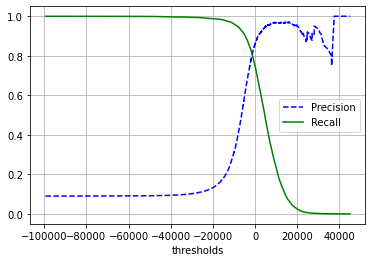

In [19]:
from sklearn.metrics import precision_recall_curve

precision,recall,thresholds=precision_recall_curve(y_train_5,y_score)
plt.plot(thresholds,precision[:-1],"b--",label="Precision") 
plt.plot(thresholds,recall[:-1],"g-",label="Recall") 
plt.xlabel("thresholds")
plt.legend()
plt.grid()
plt.show()

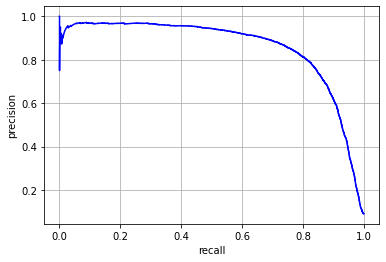

In [20]:
plt.plot(recall[:-1],precision[:-1],"b-") 

plt.xlabel("recall")
plt.ylabel("precision")
plt.grid()
plt.show()

In [21]:
threshold90=thresholds[np.argmax(precision>=0.9)]
y_train_pred90=(y_score>=threshold90)

print("Precision:",precision_score(y_train_5,y_train_pred90),"\n",
      "Recall:",recall_score(y_train_5,y_train_pred90))

Precision: 0.9000496031746031 
 Recall: 0.669433683822173


0.9 `precision` with 0.6 `recall`, `precision` always comes with `recall`!

#### ROC curve

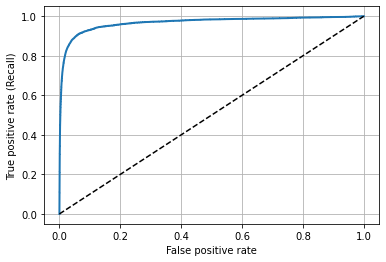

In [22]:
from sklearn.metrics import roc_curve

fpr,tpr,thresholds=roc_curve(y_train_5,y_score)

plt.plot(fpr,tpr,linewidth=2)
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.grid()
plt.show()

Tradeoff: The higher the `true positive rate`, the higher the `false positive rate`.

In [23]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5,y_score)

0.9674737375873118

consider `PR` when:
- positive class is rare. # fraud detection.
- care more about false positive> false negative.
- otherwise, consider `ROC curve`.

### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
y_rf=cross_val_predict(rf,X_train,y_train_5,cv=3,
                      method='predict_proba')

In [25]:
y_score_rf=y_rf[:,1]

fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_train_5,y_score_rf)

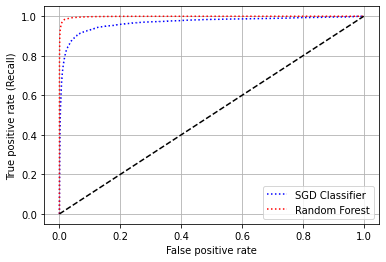

In [26]:
plt.plot(fpr,tpr,"b:",label='SGD Classifier')
plt.plot(fpr_rf,tpr_rf,"r:",label='Random Forest')
plt.plot([0,1],[0,1],'k--')

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.legend(loc='lower right')
plt.grid()
plt.show()

`Randome forest` model performs better than `SGD Classifier`.

In [27]:
roc_auc_score(y_train_5,y_score_rf)

0.9983805301927103

## Other Classifications

### Multiclass

- Multiclass:
    - Random Forest
    - Naive Bayers
- Binary Classfication:
    - Support Vector Machine
    - Linear Classifier
- OVA: one-versus-all strategy
- OVO: one-versus-one strategy: N(N-1)

In [28]:
from sklearn.multiclass import OneVsOneClassifier
ovo=OneVsOneClassifier(SGDClassifier())
ovo.fit(X_train,y_train)

OneVsOneClassifier(estimator=SGDClassifier())

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))

In [31]:
cross_val_score(ovo,X_train_scaled,y_train,
                scoring='accuracy',cv=10)

array([0.9195    , 0.9265    , 0.90383333, 0.92133333, 0.92433333,
       0.91366667, 0.91366667, 0.909     , 0.9155    , 0.93433333])

In [32]:
rf_m=cross_val_predict(rf,X_train,y_train,cv=3,
                      method='predict_proba')